In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
data = pd.read_csv('train.csv', sep=',')
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [57]:
test = pd.read_csv('test.csv', sep=',')
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [58]:
column_names_list = data.columns.values.tolist()

In [59]:
# Функция считает пропущенные значения
def missing_values_table(df):
        # всего пропущенных
        mis_val = df.isnull().sum()
        
        # процент пропущенных
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Создаём таблицу результатов
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Пропущенные значения', 1 : '% от Всего'})
        
        # Сортировка по процентам пропущенных
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% от Всего', ascending=False).round(1)
        
        # Печать саммари
        print ("Датафрейм имеет " + str(df.shape[1]) + " столбцов (столбца).\n"      
            "Среди них " + str(mis_val_table_ren_columns.shape[0]) +
              " столбцов (столбца) имеют пропущенные значения.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(data)

Датафрейм имеет 20 столбцов (столбца).
Среди них 2 столбцов (столбца) имеют пропущенные значения.


,Пропущенные значения,% от Всего
Healthcare_1,4798,48.0
LifeSquare,2113,21.1


In [60]:
missing_values_table(test)

Датафрейм имеет 19 столбцов (столбца).
Среди них 2 столбцов (столбца) имеют пропущенные значения.


,Пропущенные значения,% от Всего
Healthcare_1,2377,47.5
LifeSquare,1041,20.8


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [62]:
# Заменяем метки числами

for name in ["Ecology_2", "Ecology_3", "Shops_2"]:
    print(name)
    print(data[name].value_counts())

Ecology_2
B    9903
A      97
Name: Ecology_2, dtype: int64
Ecology_3
B    9725
A     275
Name: Ecology_3, dtype: int64
Shops_2
B    9175
A     825
Name: Shops_2, dtype: int64


In [63]:
for name in ["Ecology_2", "Ecology_3", "Shops_2"]:
    data[name] = data[name].map({'A': 1, 'B': 0}) 

In [64]:
for name in ["Ecology_2", "Ecology_3", "Shops_2"]:
    print(name)
    print(data[name].value_counts())

Ecology_2
0    9903
1      97
Name: Ecology_2, dtype: int64
Ecology_3
0    9725
1     275
Name: Ecology_3, dtype: int64
Shops_2
0    9175
1     825
Name: Shops_2, dtype: int64


In [65]:
# Семантически, этажность дома величина целая, количество комнат тоже
data = data.astype({"HouseFloor": int, "Rooms": int})


In [66]:
# Ищем неадекватные данные по количеству комнат
data.Rooms.loc[(data.Rooms > 7) |  (data.Rooms <= 0)]

377     10
1397     0
1454    19
1981     0
2269     0
3911     0
4366     0
4853     0
6149     0
8834     0
8849    10
Name: Rooms, dtype: int32

In [67]:
# по году. Предполагаем, что год постройки не может быть больше 2021, если между 2019 и 2021, скорее всего, 
# дом готовится к сдаче или ещё не построен
data.HouseYear.loc[data.HouseYear > 2021]

1497    20052011
4189        4968
Name: HouseYear, dtype: int64

In [68]:
# Заменяем кое-что вручную
data.HouseYear.loc[data.HouseYear == 20052011] = 2005
data.HouseYear.loc[data.HouseYear == 4968] = 1968

C:\Users\erida\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [69]:
# Теперь порядок
data.HouseYear.loc[data.HouseYear > 2021]

Series([], Name: HouseYear, dtype: int64)

1981    212.932361
1982    275.645284
4262    604.705972
4690    409.425181
6977    641.065193
Name: Square, dtype: float64

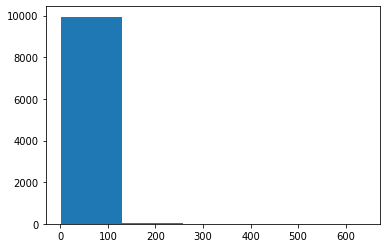

In [70]:
# Разумно предположить, что площадь - одна из основных величин, от которой зависит цена
plt.hist(data.Square, bins=5)
data.Square.loc[data.Square > 201]

In [50]:
# Три строчки вызывают сомнения. Посмотрим, как они выглядят
data.loc[4262]

Id                12376.000000
DistrictId           58.000000
Rooms                 3.000000
Square               85.555361
LifeSquare                 NaN
KitchenSquare         1.000000
Floor                18.000000
HouseFloor           17.000000
HouseYear          1977.000000
Ecology_1             0.437885
Ecology_2             0.000000
Ecology_3             0.000000
Social_1             23.000000
Social_2           5735.000000
Social_3              3.000000
Healthcare_1       1084.000000
Helthcare_2           0.000000
Shops_1               5.000000
Shops_2               0.000000
Price            198360.844763
Name: 4854, dtype: float64

In [48]:
data.loc[4690]

Id                2307.000000
DistrictId         102.000000
Rooms                1.000000
Square             409.425181
LifeSquare         410.639749
KitchenSquare       10.000000
Floor                4.000000
HouseFloor           4.000000
HouseYear         2016.000000
Ecology_1            0.238617
Ecology_2            0.000000
Ecology_3            0.000000
Social_1            26.000000
Social_2          3889.000000
Social_3             6.000000
Healthcare_1       705.000000
Helthcare_2          3.000000
Shops_1              6.000000
Shops_2              0.000000
Price            90470.430830
Name: 4690, dtype: float64

In [49]:
data.loc[6977]
# Очевидна ошибка. На всякий случай проверим ещё оставшиеся.

Id                11602.000000
DistrictId           30.000000
Rooms                 2.000000
Square              641.065193
LifeSquare          638.163193
KitchenSquare        10.000000
Floor                20.000000
HouseFloor           19.000000
HouseYear          2019.000000
Ecology_1             0.000078
Ecology_2             0.000000
Ecology_3             0.000000
Social_1             22.000000
Social_2           6398.000000
Social_3            141.000000
Healthcare_1       1046.000000
Helthcare_2           3.000000
Shops_1              23.000000
Shops_2               0.000000
Price            133529.681562
Name: 6977, dtype: float64

In [51]:
print(data.loc[1982])
data.loc[1981]
# Похоже на правду. 

Id                 5548.000000
DistrictId           86.000000
Rooms                 5.000000
Square              275.645284
LifeSquare          233.949309
KitchenSquare        26.000000
Floor                12.000000
HouseFloor           37.000000
HouseYear          2011.000000
Ecology_1             0.161976
Ecology_2             0.000000
Ecology_3             1.000000
Social_1             31.000000
Social_2           7010.000000
Social_3              5.000000
Healthcare_1       4508.000000
Helthcare_2           3.000000
Shops_1               7.000000
Shops_2               0.000000
Price            455264.882666
Name: 1982, dtype: float64


Id                 7917.000000
DistrictId           27.000000
Rooms                 0.000000
Square              212.932361
LifeSquare          211.231125
KitchenSquare         0.000000
Floor                 2.000000
HouseFloor            3.000000
HouseYear          2008.000000
Ecology_1             0.211401
Ecology_2             0.000000
Ecology_3             0.000000
Social_1              9.000000
Social_2           1892.000000
Social_3              0.000000
Healthcare_1               NaN
Helthcare_2           0.000000
Shops_1               1.000000
Shops_2               0.000000
Price            302211.260887
Name: 1981, dtype: float64

In [71]:
data = data.loc[data.Square < 300]

(array([5.683e+03, 4.185e+03, 1.130e+02, 1.500e+01, 1.000e+00]),
 array([  1.13685878,  56.03854384, 110.9402289 , 165.84191396,
        220.74359902, 275.64528408]),
 <a list of 5 Patch objects>)

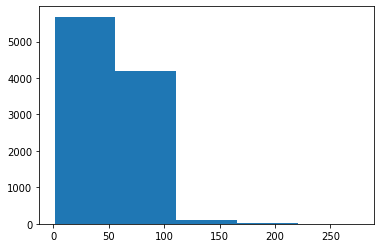

In [73]:
plt.hist(data.Square, bins=5)
# Вроде порядок

In [76]:
# Учитывая треш, который тут творится (жилая площадь больше общей) и 21% отсутствующих значений, можно не учитывать
# жилую площадь при предсказании
data.loc[data.Square < data.LifeSquare]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1,42.530043,43.967759,1.0,3,9,2014,0.034656,0,0,0,168,0,NaN,0,0,0,95338.198549
44,10521,38,3,104.211396,106.340403,0.0,20,0,2017,0.060753,0,0,15,2787,2,520.0,0,7,0,435462.048070
52,2301,1,2,61.400054,65.224603,0.0,17,22,2016,0.007122,0,0,1,264,0,NaN,0,1,0,199215.452229
123,8753,25,3,85.952306,89.803753,1.0,4,3,2017,0.069753,0,0,53,13670,4,NaN,1,11,0,309688.592681
153,9870,62,1,51.831473,53.491301,1.0,5,1,2015,0.072158,0,0,2,629,1,NaN,0,0,1,131797.472284
178,2416,57,1,29.298168,29.770784,5.0,7,5,1964,0.133215,0,0,49,11395,3,1406.0,3,4,1,148991.265200
184,3398,74,1,48.743665,51.011232,1.0,12,20,2017,0.075779,0,0,6,1437,3,NaN,0,2,0,165071.825722
212,1748,88,2,5.497061,67.628717,1.0,24,22,1977,0.127376,0,0,43,8429,3,NaN,3,9,0,412511.088764
217,5540,27,3,57.643613,59.425078,9.0,16,10,1977,0.072158,0,0,2,629,1,NaN,0,0,1,198351.892455
234,12633,27,3,81.867166,81.884548,0.0,12,19,1977,0.211401,0,0,9,1892,0,NaN,0,1,0,182228.520030


(array([9.995e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([   0. ,  201.4,  402.8,  604.2,  805.6, 1007. , 1208.4, 1409.8,
        1611.2, 1812.6, 2014. ]),
 <a list of 10 Patch objects>)

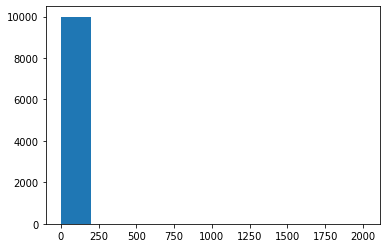

In [77]:
plt.hist(data.KitchenSquare)

In [107]:
data.loc[(data.KitchenSquare == 0.0) | (data.KitchenSquare > data.Square)]
# data.loc[(data.KitchenSquare == 0.0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,0,0,34,7759,0,229.0,1,3,0,220925.908524
7,11993,74,2,80.312926,NaN,0.0,14,0,1977,0.075779,0,0,6,1437,3,NaN,0,2,0,221244.156664
23,6641,54,3,118.907612,NaN,0.0,2,0,1977,0.006076,0,0,30,5285,0,645.0,6,6,0,571069.052600
26,4378,27,3,106.958871,0.641822,0.0,17,0,2018,0.072158,0,0,2,629,1,NaN,0,0,1,337299.867936
39,9371,23,2,60.503248,NaN,0.0,16,0,1977,0.034656,0,0,0,168,0,NaN,0,0,0,229778.057902
42,9833,1,2,56.494318,54.723569,0.0,9,17,1977,0.007122,0,0,1,264,0,NaN,0,1,0,196078.907289
44,10521,38,3,104.211396,106.340403,0.0,20,0,2017,0.060753,0,0,15,2787,2,520.0,0,7,0,435462.048070
52,2301,1,2,61.400054,65.224603,0.0,17,22,2016,0.007122,0,0,1,264,0,NaN,0,1,0,199215.452229
65,11398,62,1,41.194188,NaN,0.0,6,0,1977,0.072158,0,0,2,629,1,NaN,0,0,1,114063.092041
70,10362,27,2,79.227049,NaN,0.0,9,0,1977,0.072158,0,0,2,629,1,NaN,0,0,1,167023.973143


In [82]:
data.loc[(data.Floor == 0) | (data.Floor > data.HouseFloor)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2,80.312926,NaN,0.0,14,0,1977,7.577876e-02,0,0,6,1437,3,NaN,0,2,0,221244.156664
14,10953,27,1,53.769097,52.408027,1.0,5,4,1977,7.215758e-02,0,0,2,629,1,NaN,0,0,1,140647.565937
16,2119,27,2,49.360648,31.993964,5.0,6,5,1983,5.181543e-02,0,0,5,1227,0,NaN,0,0,0,117000.381287
21,11935,27,2,64.711835,NaN,1.0,15,1,1977,2.114012e-01,0,0,9,1892,0,NaN,0,1,0,127200.026511
23,6641,54,3,118.907612,NaN,0.0,2,0,1977,6.076152e-03,0,0,30,5285,0,645.0,6,6,0,571069.052600
26,4378,27,3,106.958871,0.641822,0.0,17,0,2018,7.215758e-02,0,0,2,629,1,NaN,0,0,1,337299.867936
35,6486,200,3,85.280389,58.447967,9.0,6,5,1960,0.000000e+00,0,0,33,7425,1,NaN,2,5,0,402871.916317
39,9371,23,2,60.503248,NaN,0.0,16,0,1977,3.465608e-02,0,0,0,168,0,NaN,0,0,0,229778.057902
44,10521,38,3,104.211396,106.340403,0.0,20,0,2017,6.075305e-02,0,0,15,2787,2,520.0,0,7,0,435462.048070
51,10103,94,1,35.280894,23.354176,6.0,11,9,1971,2.827977e-01,0,0,33,8667,2,NaN,0,6,0,148862.210174


(array([4136., 1730.,  941.,  830., 1105.,  477.,  239.,  185.,  293.,
          61.]),
 array([0.        , 0.05218671, 0.10437341, 0.15656012, 0.20874682,
        0.26093353, 0.31312023, 0.36530694, 0.41749364, 0.46968035,
        0.52186705]),
 <a list of 10 Patch objects>)

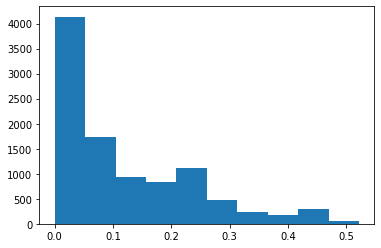

In [84]:
# Не уверен, что делать с показателями экологии и магазинов, но, хотя бы, посмотрю на распределения и выбросы
plt.hist(data["Ecology_1"])


(array([2613.,  523., 1103., 1686., 1767.,  878.,  596.,  556.,   99.,
         176.]),
 array([ 0. ,  7.4, 14.8, 22.2, 29.6, 37. , 44.4, 51.8, 59.2, 66.6, 74. ]),
 <a list of 10 Patch objects>)

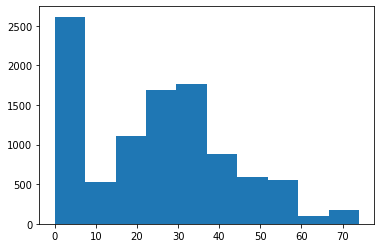

In [87]:
plt.hist(data["Social_1"])

(array([2861.,  893., 2212., 1925.,  726.,  770.,   79.,  355.,    0.,
         176.]),
 array([  168. ,  2059.5,  3951. ,  5842.5,  7734. ,  9625.5, 11517. ,
        13408.5, 15300. , 17191.5, 19083. ]),
 <a list of 10 Patch objects>)

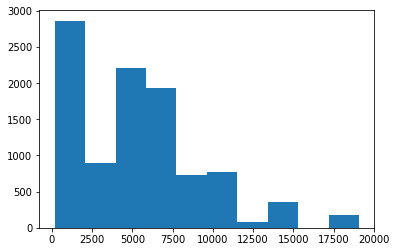

In [88]:
plt.hist(data["Social_2"])

(array([9233.,  256.,   18.,  116.,   25.,   53.,   52.,    0.,    0.,
         244.]),
 array([  0. ,  14.1,  28.2,  42.3,  56.4,  70.5,  84.6,  98.7, 112.8,
        126.9, 141. ]),
 <a list of 10 Patch objects>)

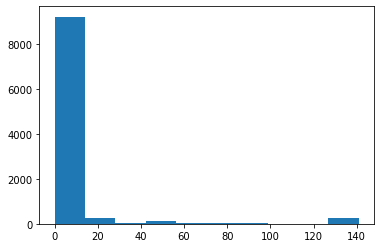

In [91]:
plt.hist(data["Social_3"])

In [92]:
data.loc[data.Social_3 > 100]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
271,7674,30,2,51.283020,51.575295,1.0,5,17,1977,0.000078,0,0,22,6398,141,1046.0,3,23,0,174735.177184
286,689,30,4,94.164934,60.322255,10.0,8,16,2005,0.000078,0,0,22,6398,141,1046.0,3,23,0,517817.162981
289,9320,30,3,76.265622,NaN,1.0,4,2,2016,0.000078,0,0,22,6398,141,1046.0,3,23,0,202260.788133
323,10144,30,2,62.180283,NaN,1.0,8,17,1977,0.000078,0,0,22,6398,141,1046.0,3,23,0,165895.486923
512,811,30,2,83.033107,NaN,1.0,2,12,2014,0.000078,0,0,22,6398,141,1046.0,3,23,0,200634.301894
547,2917,30,3,83.596365,NaN,1.0,3,16,1977,0.000078,0,0,22,6398,141,1046.0,3,23,0,198393.446449
570,4384,30,1,46.119566,NaN,1.0,5,1,1977,0.000078,0,0,22,6398,141,1046.0,3,23,0,129364.351533
571,5021,30,1,63.620542,NaN,1.0,4,17,1977,0.000078,0,0,22,6398,141,1046.0,3,23,0,173209.186142
597,9177,30,1,49.687691,NaN,1.0,18,17,1977,0.000078,0,0,22,6398,141,1046.0,3,23,0,153591.551569
603,2070,30,1,70.868007,66.380039,1.0,14,14,2015,0.000078,0,0,22,6398,141,1046.0,3,23,0,111851.447814


In [100]:
print(data.DistrictId.unique())
data.loc[data.DistrictId == 1].sort_values(by = ["DistrictId"])

# Возникает подозрение, что экология, социалка, здоровье и магазины привязаны к id округа

[ 35  41  53  58  99  59 154  74   1  23  28  31  13  57  27  85  34  19
   0  48  54 150  11  50  61  44  90 200  43 177 101  38  21 103  98 170
  94   5  88  47   6  52  62  77  79   9 156  69 108  96 169  18 148 128
  10 144 120  39   7  84 123 159  70 129   3  95  78  45  15 121  49  25
   2 127  56 109  46  17 119  80  86  83 137  91  92 118 187  36 106 161
  22  63 167 113  66  29  37  20   8 181  40  93  30  81 107 130 100  12
 125  67  26  89  24 111 138  64 124 183  55 157 151  33  87 126 155 164
 105 110 132  71  73 189  75 122 163 141  76 115 139 143 201 165 190 193
 174  60 114 172 134 117 149 153 131 145  82 160  42  32 133 208 171 176
 173 147  97 142 195 180 196 112  72 175   4 186 146 191 168 192  14 199
 136 162 179 188 135 140  16  51 178 104  68 152 194 116 207 185  65 102
 166 182 202 184 205 209 158]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8,5172,1,2,64.511437,NaN,1.0,9,17,1977,0.007122,0,0,1,264,0,NaN,0,1,0,229102.795999
6843,15500,1,1,39.470110,41.237865,1.0,4,17,1977,0.007122,0,0,1,264,0,NaN,0,1,0,140585.830169
6855,3891,1,1,46.869542,NaN,1.0,16,24,1977,0.007122,0,0,1,264,0,NaN,0,1,0,156181.039393
6868,11701,1,1,38.514899,41.905883,1.0,16,17,2017,0.007122,0,0,1,264,0,NaN,0,1,0,133050.406251
6877,8383,1,1,40.655978,NaN,0.0,8,17,1977,0.007122,0,0,1,264,0,NaN,0,1,0,145009.387347
6881,5259,1,2,56.209735,30.719953,8.0,15,14,1991,0.025609,0,0,33,5261,0,240.0,3,1,0,203858.095745
6889,15538,1,2,63.420247,NaN,1.0,6,17,1977,0.007122,0,0,1,264,0,NaN,0,1,0,227019.191502
6899,15729,1,1,38.749246,NaN,10.0,5,17,2018,0.007122,0,0,1,264,0,NaN,0,1,0,138319.482813
6816,8272,1,2,63.420424,NaN,1.0,4,17,1977,0.007122,0,0,1,264,0,NaN,0,1,0,191328.437176
6902,10269,1,1,39.726817,NaN,1.0,8,17,1977,0.007122,0,0,1,264,0,NaN,0,1,0,153505.671869


(array([ 916., 2791., 3167., 1434.,  731.,  437.,  254.,  154.,   72.,
          41.]),
 array([ 59174.77802758, 116580.64688182, 173986.51573605, 231392.38459029,
        288798.25344453, 346204.12229876, 403609.991153  , 461015.86000724,
        518421.72886147, 575827.59771571, 633233.46656995]),
 <a list of 10 Patch objects>)

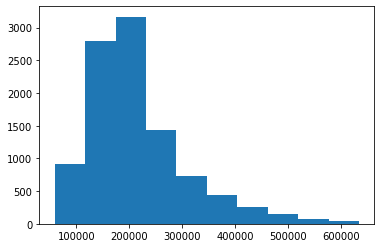

In [103]:
plt.hist(data.Price)

In [99]:
correlations_data = data.corr()['DistrictId'].sort_values()
correlations_data

HouseYear       -0.201326
HouseFloor      -0.148823
Floor           -0.120079
Square          -0.027302
LifeSquare      -0.020027
Id               0.012993
Shops_2          0.021014
Ecology_3        0.027902
KitchenSquare    0.040336
Ecology_1        0.065177
Rooms            0.071589
Ecology_2        0.093416
Social_3         0.136568
Social_2         0.167564
Shops_1          0.174505
Social_1         0.246480
Price            0.265258
Healthcare_1     0.304291
Helthcare_2      0.306191
DistrictId       1.000000
Name: DistrictId, dtype: float64

In [109]:
# Начнём с простого удаления данных
data_clear = data.copy()

In [110]:
data_clear = data_clear.loc[(data_clear.Rooms < 7) |  (data_clear.Rooms > 0)]
# data_clear = data_clear.loc[data_clear.Square > data_clear.LifeSquare] не будем делать этого и не будем использовать
data_clear = data_clear.loc[(data_clear.KitchenSquare != 0.0) | (data_clear.KitchenSquare <= data.Square)]
# Удалим столбцы, которые имеют большой процент значений nan, либо большое количество неверных данных
del data_clear['LifeSquare']
del data_clear['Floor']
del data_clear['HouseFloor']
del data_clear["Healthcare_1"]

In [112]:
data_clear.loc[data_clear.Ecology_1 == 0]

,Id,DistrictId,Rooms,Square,KitchenSquare,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
11,12427,31,3,68.808859,7.0,1959,0.0,0,0,23,3684,2,0,4,0,165534.541425
35,6486,200,3,85.280389,9.0,1960,0.0,0,0,33,7425,1,2,5,0,402871.916317
38,8224,177,3,77.873936,12.0,2012,0.0,0,0,36,6714,2,0,2,0,191550.121357
80,15600,108,2,49.888740,6.0,1974,0.0,0,0,23,3684,2,0,4,0,261086.024406
83,2855,18,2,61.718553,10.0,2000,0.0,0,0,30,5562,0,0,5,1,267609.827251
89,11902,128,2,52.082183,8.0,1994,0.0,0,0,27,4798,0,2,8,0,243824.792971
94,13887,7,3,74.971054,10.0,1987,0.0,0,0,23,5067,4,2,6,0,415398.573031
102,13957,123,2,58.911918,9.0,2005,0.0,0,0,47,11319,0,3,5,0,274570.717501
114,14635,95,2,42.389567,5.0,1963,0.0,0,0,7,1660,39,1,5,0,224746.811857
118,14822,18,3,76.235137,10.0,1997,0.0,0,0,30,5562,0,0,5,1,293371.957559


In [115]:
data_clear

,Id,DistrictId,Rooms,Square,KitchenSquare,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,6.0,1969,8.903972e-02,0,0,33,7976,5,0,11,0,184966.930730
1,15053,41,3,65.683640,8.0,1978,6.998930e-05,0,0,46,10309,1,1,16,0,300009.450063
2,4765,53,2,44.947953,0.0,1968,4.963726e-02,0,0,34,7759,0,1,3,0,220925.908524
3,5809,58,2,53.352981,9.0,1977,4.378852e-01,0,0,23,5735,3,0,5,0,175616.227217
4,10783,99,1,39.649192,7.0,1976,1.233889e-02,0,0,35,5776,1,2,4,0,150226.531644
5,12915,59,3,80.384479,12.0,2011,3.094791e-01,0,0,35,7715,4,0,6,0,215898.447742
6,14549,154,2,62.254114,7.0,1960,4.605564e-01,0,0,20,4386,14,1,5,0,296021.204377
7,11993,74,2,80.312926,0.0,1977,7.577876e-02,0,0,6,1437,3,0,2,0,221244.156664
8,5172,1,2,64.511437,1.0,1977,7.122317e-03,0,0,1,264,0,0,1,0,229102.795999
9,8649,23,1,46.461409,8.0,2014,7.577876e-02,0,0,6,1437,3,0,2,0,95380.220993


In [116]:
from sklearn.model_selection import train_test_split

X = data_clear.copy()
y = data_clear.Price
del X["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1235142)



In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor as rf

params={'min_samples_leaf':[2, 3, 5, 7, 11, 13, 17],
        'n_estimators':[5,10,15,20,25,50,75,100,125,150],
        'max_depth':[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
       }
regr_test=GridSearchCV(rf(),param_grid=params,cv=3,n_jobs=-1)
regr_test.fit(X_train,y_train)
print(f"Лучшие параметры {regr_test.best_params_} дали результат {regr_test.best_score_}")

Лучшие параметры {'max_depth': 23, 'min_samples_leaf': 3, 'n_estimators': 100} дали результат 0.718611252463723


In [120]:
# Не плохо, можно работать
rfr = rf(max_depth=23, min_samples_leaf=3, n_estimators=100, random_state=4894)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)


In [122]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7231909901412493

In [123]:
# Пока остановимся на этом варианте и посмотрим, что у нас с тестовыми данными
test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [124]:
for name in ["Ecology_2", "Ecology_3", "Shops_2"]:
    test[name] = test[name].map({'A': 1, 'B': 0}) 

In [126]:
# Посмотрим, как там у теста
for name in column_names_list:
    print(name)
    print(test[name].value_counts())

Id
1066     1
12995    1
15030    1
6010     1
4795     1
11183    1
701      1
12991    1
16607    1
10948    1
2740     1
709      1
6854     1
12706    1
8905     1
6858     1
2764     1
2558     1
8885     1
10035    1
12791    1
3218     1
8841     1
14986    1
653      1
10896    1
9851     1
4755     1
4759     1
6810     1
        ..
1370     1
15709    1
1318     1
3423     1
9570     1
5476     1
11623    1
5480     1
7529     1
5484     1
7497     1
5448     1
1350     1
1346     1
13608    1
2340     1
3371     1
11567    1
9178     1
3379     1
5428     1
9526     1
7481     1
1338     1
13628    1
7485     1
9534     1
5440     1
7489     1
16384    1
Name: Id, Length: 5000, dtype: int64
DistrictId
27     391
1      344
23     264
6      257
9      132
62     122
30     115
58      91
53      91
21      70
52      67
8       64
61      64
46      61
34      61
74      61
29      60
3       56
57      54
48      51
47      49
45      49
13      47
101     46
44      46
11 

KeyError: 'Price'

In [127]:
test.loc[test.Rooms == 17]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,0,0,23,4635,5,3300.0,2,4,0


In [128]:
# TODO: Комнаты, 1 значение 17 поменять
# TODO:
test_clear = test.copy()
test_clear.Rooms.loc[test_clear.Rooms == 17] = 3
# Удалим столбцы, которые были проигнорированы при построении модели, и будем счастливы
del test_clear['LifeSquare']
del test_clear['Floor']
del test_clear['HouseFloor']
del test_clear["Healthcare_1"]

C:\Users\erida\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [130]:
test_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
KitchenSquare    5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int64
Ecology_3        5000 non-null int64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int64
dtypes: float64(4), int64(11)
memory usage: 586.0 KB


In [131]:
test_clear = test_clear.astype({"Rooms": int})

In [138]:
# Пойдём по пути наименьшего сопротивления и никаких других действий с данными делать не будем. 
# Возможно, лучший вариант будет, если пропущенные или неверные данные будут восстановлены или предсказаны, 
# но мне не хватит времени ((

y_predict = test_clear["Price"] = rfr.predict(test_clear)

(array([ 205.,  981., 1761.,  904.,  490.,  307.,  169.,  125.,   46.,
          12.]),
 array([ 65711.2825129 , 113949.40600762, 162187.52950234, 210425.65299706,
        258663.77649179, 306901.89998651, 355140.02348123, 403378.14697595,
        451616.27047068, 499854.3939654 , 548092.51746012]),
 <a list of 10 Patch objects>)

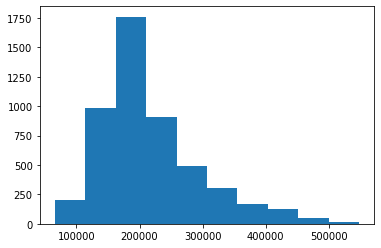

In [140]:
plt.hist(y_predict) # Вроде похоже на правду

In [141]:
test_clear

,Id,DistrictId,Rooms,Square,KitchenSquare,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,725,58,2,49.882643,6.0,1972,0.310199,0,0,11,2748,1,0,0,0,153632.757711
1,15856,74,2,69.263183,1.0,1977,0.075779,0,0,6,1437,3,0,2,0,190967.008487
2,5480,190,1,13.597819,12.0,1909,0.000000,0,0,30,7538,87,5,5,0,231154.104973
3,15664,47,2,73.046609,9.0,2007,0.101872,0,0,23,4583,3,3,3,0,352524.817108
4,14275,27,1,47.527111,1.0,2017,0.072158,0,0,2,629,1,0,0,1,142838.074411
5,7633,53,1,40.675627,1.0,1977,0.049637,0,0,34,7759,0,1,3,0,198602.727227
6,13329,23,2,68.099538,1.0,1977,0.075779,0,0,6,1437,3,0,2,0,172410.472893
7,5502,32,2,48.193897,6.0,1972,0.135650,0,0,46,7960,6,3,11,0,225096.204471
8,4220,96,3,72.277106,9.0,1997,0.041116,0,0,53,14892,4,1,4,0,289722.172344
9,11538,6,3,80.219400,9.0,2014,0.243205,0,0,5,1564,0,0,0,0,209971.949145


In [142]:
test_clear[["Id","Price"]].to_csv('VVlasov_predictions.csv',index=None)